# Two-view Geometry
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-10-13

## Table of Contents
* Skew-symmetric Matrix
* Fundamental Matrix
* 8-point Algorithm (Equation)
* Rank 2 and Rank 3 Matrix
* F-matrix (Enforcing Rank 2)
* 8-Point Algorithm (Experiment)
* Normalized 8-point Algorithms

## Skew-symmetric Matrix


In [3]:
import numpy as np

# Generate random vectors
a = np.random.rand(3, 1)
b = np.random.rand(3, 1)

# Constructing the skew symmetric matrix for vector 'a'
a_sk = np.zeros((3, 3))
a_sk[0, 1] = -a[2, 0]
a_sk[1, 0] =  a[2, 0]
a_sk[0, 2] =  a[1, 0]
a_sk[2, 0] = -a[1, 0]
a_sk[1, 2] = -a[0, 0]
a_sk[2, 1] =  a[0, 0]

# Compute the rank of the skew symmetric matrix
matrix_rank = np.linalg.matrix_rank(a_sk)
print(f"Rank of a_sk: {matrix_rank}")

# Compute cross product of 'a' and 'b'
m1 = np.cross(a[:,0], b[:,0])[:, np.newaxis]  # The cross product reduces the dimension, so we use np.newaxis to keep it as a column vector
print(f"m1:\n{m1}")

# Compute the matrix multiplication of a_sk and 'b'
m2 = np.dot(a_sk, b)
print(f"m2:\n{m2}")


Rank of a_sk: 2
m1:
[[ 0.17895592]
 [-0.30950561]
 [ 0.02877235]]
m2:
[[ 0.17895592]
 [-0.30950561]
 [ 0.02877235]]


## Fundamental Matrix


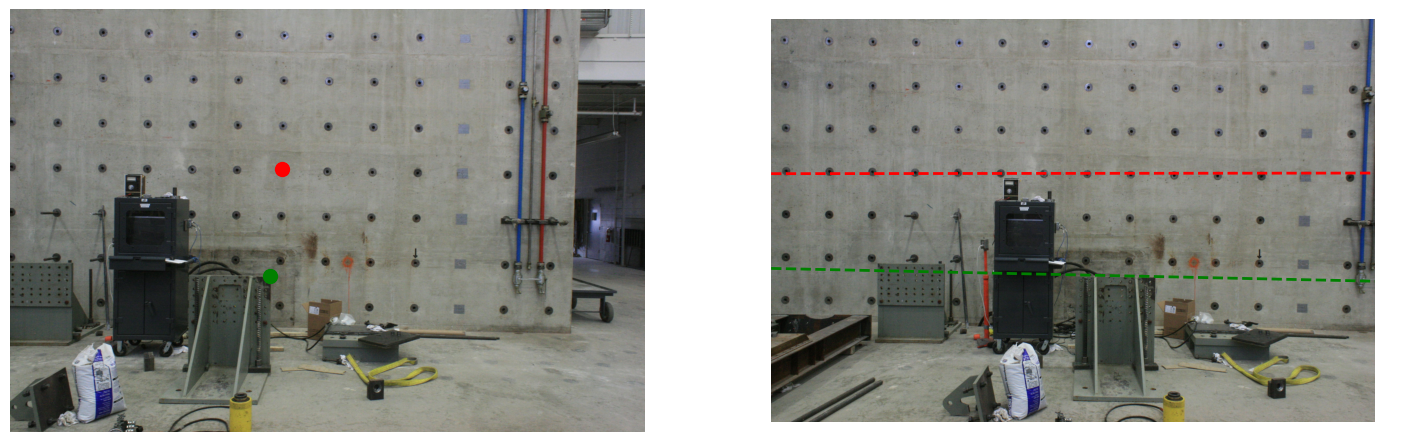

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image

# Load the fundamental matrix 'F' from a .mat file
data = sio.loadmat('data_sfm.mat')
F = data['F']

# Set up the figure with specific dimensions
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Load the two images
img1 = Image.open('img1.jpg')
img2 = Image.open('img2.jpg')

# Define two points from the two images
x1 = [1665, 981]
x2 = [1596, 1634]

# Compute the epipolar lines corresponding to the points using the fundamental matrix
l1 = np.dot(F, [x1[0], x1[1], 1])
l2 = np.dot(F, [x2[0], x2[1], 1])

# Define the range of x values for plotting the epipolar lines
xg = [1, img2.size[0]]  # Image width

# Convert the equation of the line from ax+by+c=0 format to y = (-ax-c)/b
yf = lambda l, x: (-l[0]*x - l[2])/l[1]
y1g = [yf(l1, xg[0]), yf(l1, xg[1])]
y2g = [yf(l2, xg[0]), yf(l2, xg[1])]

# Plot the first image and the two points
axs[0].imshow(img1)
axs[0].plot(x1[0], x1[1], 'ro', markersize=10, linewidth=3)
axs[0].plot(x2[0], x2[1], 'go', markersize=10, linewidth=3)
axs[0].axis('off')

# Plot the second image and the corresponding epipolar lines
axs[1].imshow(img2)
axs[1].plot(xg, y1g, 'r--', linewidth=2)
axs[1].plot(xg, y2g, 'g--', linewidth=2)
axs[1].axis('off')

plt.show()


## 8-point Algorithm (Equation)


In [7]:
import sympy as sp

# Define the symbolic variables
f11, f12, f13, f21, f22, f23, f31, f32, f33 = sp.symbols('f11 f12 f13 f21 f22 f23 f31 f32 f33')
u, v, up, vp = sp.symbols('u v up vp')

# Construct the fundamental matrix F
F = sp.Matrix([
    [f11, f12, f13],
    [f21, f22, f23],
    [f31, f32, f33]
])

# Define the points x and xp
x = sp.Matrix([u, v, 1])
xp = sp.Matrix([up, vp, 1])

# Construct the equation transpose(xp) * F * x = 0
eqn = xp.T * F * x

print('eqn = ')
display(eqn)

# eqn is a 1x1 matrix, to get the scalar equation we access its first element
scalar_eqn = eqn[0] 

# Express the equation in terms of the components of F
A, _ = sp.linear_eq_to_matrix([scalar_eqn], [f11, f12, f13, f21, f22, f23, f31, f32, f33])

# Display the matrix A
print('A = ')
display(A)


eqn = 


Matrix([[f13*up + f23*vp + f33 + u*(f11*up + f21*vp + f31) + v*(f12*up + f22*vp + f32)]])

A = 


Matrix([[u*up, up*v, up, u*vp, v*vp, vp, u, v, 1]])

## Rank 2 and Rank 3 Matrix


In [8]:
import numpy as np

# Construct matrices M1 and M2
M1 = np.array([[1, 0, 1],
               [0, 1, 1],
               [0, 0, 0]])

M2 = np.array([[1, 0, 1],
               [0, 1, 1],
               [0, 0, 0.001]])

# Perform singular value decomposition (SVD) on M1 and M2
_, D1, _ = np.linalg.svd(M1)
_, D2, _ = np.linalg.svd(M2)

# Print singular values for M1 and M2
print("Singular values for M1:", D1)
print("Singular values for M2:", D2)

# Compute and print rank of M1 and M2
rank_M1 = np.linalg.matrix_rank(M1)
rank_M2 = np.linalg.matrix_rank(M2)

print("Rank of M1:", rank_M1)
print("Rank of M2:", rank_M2)


Singular values for M1: [1.73205081 1.         0.        ]
Singular values for M2: [1.73205100e+00 1.00000000e+00 5.77350205e-04]
Rank of M1: 2
Rank of M2: 3


## F-matrix (Enforcing Rank 2)


In [9]:
import numpy as np

# Generate a random 3x3 matrix FT
FT = np.random.rand(3, 3)

# Perform singular value decomposition (SVD) on FT
U, D_values, V = np.linalg.svd(FT)

# Print rank of FT
print("Rank of FT:", np.linalg.matrix_rank(FT))

# Impose the rank-2 constraint by setting the smallest singular value to 0
D_values[2] = 0

# Construct the matrix D with updated singular values
D = np.diag(D_values)

# Compute the rank-2 matrix F
F = np.dot(U, np.dot(D, V))

# Perform SVD on F to check its singular values
U, D_values, V = np.linalg.svd(F)

# Print rank of F
print("Rank of F:", np.linalg.matrix_rank(F))


Rank of FT: 3
Rank of F: 2


## 8-Point Algorithm (Experiment)


In [2]:
import numpy as np
from scipy.linalg import null_space, svd

# Define the rotx, roty, and rotz functions
def rotx(theta):
    rad = np.deg2rad(theta)
    return np.array([[1, 0, 0], [0, np.cos(rad), -np.sin(rad)], [0, np.sin(rad), np.cos(rad)]])

def roty(theta):
    rad = np.deg2rad(theta)
    return np.array([[np.cos(rad), 0, np.sin(rad)], [0, 1, 0], [-np.sin(rad), 0, np.cos(rad)]])

def rotz(theta):
    rad = np.deg2rad(theta)
    return np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])

# Synthetic projection matrix creation
P1 = np.hstack([np.eye(3), np.zeros((3,1))])
P2 = np.dot(np.eye(3), np.hstack([np.dot(np.dot(rotx(10), roty(20)), rotz(30)), np.array([[5], [5], [1]]).reshape(-1,1)]))

# Synthetic 100 numbers of 3D points (X)
nPt = 100
X = np.random.rand(4, nPt)

# Image points corresponding to each X
x1 = np.dot(P1, X)
x1 = x1[:2, :] / x1[2, :]
x2 = np.dot(P2, X)
x2 = x2[:2, :] / x2[2, :]

# 8-point algorithm
funRow = lambda u,v,up,vp: [u*up, v*up, up, u*vp, v*vp, vp, u, v, 1]
A = np.array([funRow(x1[0, i], x1[1, i], x2[0, i], x2[1, i]) for i in np.random.choice(nPt, 8, replace=False)])

# Calculate the Fundamental Matrix F using SVD
_, _, V = np.linalg.svd(A)
F = V[-1, :].reshape(3, 3)

# Enforcing rank 2
U, D, Vt = np.linalg.svd(F)
D[-1] = 0
F = np.dot(U, np.dot(np.diag(D), Vt))

# Test x'*F*x = 0
xFx = np.array([abs(np.dot(np.hstack([x2[:,i], [1]]), F).dot(np.hstack([x1[:,i], [1]]))) for i in range(nPt)])

# Compute Fundamental Matrix from projection matrices
C1 = null_space(P1)
e2 = np.dot(P2, C1)
e2x = np.array([[0, -e2[2, 0], e2[1, 0]],
                [e2[2, 0], 0, -e2[0, 0]],
                [-e2[1, 0], e2[0, 0], 0]])
FNew = np.dot(e2x, np.dot(P2, np.linalg.pinv(P1)))

# Displaying the matrices
print(F/F[-1,-1])
print(FNew/FNew[-1,-1])


[[ 0.62083176 -0.30515121 -1.89639597]
 [-0.72770494  0.81703932  1.69639597]
 [ 0.53436589 -2.55944053  1.        ]]
[[ 0.62083176 -0.30515121 -1.89639597]
 [-0.72770494  0.81703932  1.69639597]
 [ 0.53436589 -2.55944053  1.        ]]


## Normalized 8-point Algorithms

In [19]:
import numpy as np

# Quick testing
xo = np.array([[0, 0], [700, 0], [700, 500], [0, 500]])  # original points
T = np.array([[2/700, 0, -1], [0, 2/500, -1], [0, 0, 1]])
xn = T @ np.column_stack((xo, np.ones(4))).T  # new points

# Normalize by the third row
xn = xn[:2, :] / xn[2, :]
print(xn)


[[-1.  1.  1. -1.]
 [-1. -1.  1.  1.]]


In [66]:
import numpy as np

np.random.seed(0)

# Create rotation matrices for rotx, roty, rotz
def rotx(theta):
    return np.array([
        [1, 0, 0],
        [0, np.cos(np.deg2rad(theta)), -np.sin(np.deg2rad(theta))],
        [0, np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta))]
    ])

def roty(theta):
    return np.array([
        [np.cos(np.deg2rad(theta)), 0, np.sin(np.deg2rad(theta))],
        [0, 1, 0],
        [-np.sin(np.deg2rad(theta)), 0, np.cos(np.deg2rad(theta))]
    ])

def rotz(theta):
    return np.array([
        [np.cos(np.deg2rad(theta)), -np.sin(np.deg2rad(theta)), 0],
        [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)), 0],
        [0, 0, 1]
    ])

# synthetic projection matrix creation
K = np.array([[4000, 0, 2500], [0, 4000, 2500], [0, 0, 1]])
P1 = np.hstack([K, np.zeros((3,1))])
P2 = K @ np.hstack([rotx(10) @ roty(20) @ rotz(30), np.array([[-1], [-1], [1]])])

# synthetic 100 numbers of 3D points (X)
nPt = 100
X = np.random.rand(4, nPt)

# images points corresponding to each X
x1 = P1 @ X
x1 = x1[:2, :] / x1[2, :]
x2 = P2 @ X
x2 = x2[:2, :] / x2[2, :]

# randomly pick 8 points
id = np.random.choice(nPt, 8, replace=False)

# add perturbation
x1[0, id[0]] += 10
x1[1, id[0]] += 10

def funRow(u, v, up, vp):
    return np.array([u*up, v*up, up, u*vp, v*vp, vp, u, v, 1])

# 8 point algorithm
A = np.zeros((8,9))
for i in range(8):
    A[i,:] = funRow(x1[0, id[i]], x1[1, id[i]], x2[0, id[i]], x2[1, id[i]])

_, _, Vt = np.linalg.svd(A)
F = Vt[-1, :].reshape(3, 3)
U, S, Vt = np.linalg.svd(F)
F = U @ np.diag([S[0], S[1], 0]) @ Vt

# test transpose(x')*F*x = 0 
xFx = []
for i in range(nPt):
    l = np.hstack([x2[:,i], 1]).T @ F
    dist = abs(l[0]*x1[0,i] + l[1]*x1[1,i] + l[2]) / np.linalg.norm(l[:2])
    xFx.append(dist)

# normalized 8 point algorithm
T1 = np.array([[2/5000, 0, -1], [0, 2/5000, -1], [0, 0, 1]])
T2 = np.array([[2/5000, 0, -1], [0, 2/5000, -1], [0, 0, 1]])

x1_homogeneous = T1 @ np.vstack([x1, np.ones(nPt)])
x1T = x1_homogeneous[:2, :] / x1_homogeneous[2, :]

x2_homogeneous = T2 @ np.vstack([x2, np.ones(nPt)])
x2T = x2_homogeneous[:2, :] / x2_homogeneous[2, :]


A = np.zeros((8,9))
for i in range(8):
    A[i,:] = funRow(x1T[0, id[i]], x1T[1, id[i]], x2T[0, id[i]], x2T[1, id[i]])

_, _, Vt = np.linalg.svd(A)
FT = Vt[-1, :].reshape(3, 3)
U, S, Vt = np.linalg.svd(FT)
FT = U @ np.diag([S[0], S[1], 0]) @ Vt

F = T2.T @ FT @ T1

# error computation
xFx_norm = []
for i in range(nPt):
    l = np.hstack([x2[:,i], 1]).T @ F
    dist = abs(l[0]*x1[0,i] + l[1]*x1[1,i] + l[2]) / np.linalg.norm(l[:2])
    xFx_norm.append(dist)

print(f"Mean xFx error: {np.mean(xFx)}")
print(f"Normalized mean xFx error: {np.mean(xFx_norm)}")


Mean xFx error: 256.41147093938815
Normalized mean xFx error: 169.11810194139693
